## Question 1: Inverse Method for exponentials

1. Use the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), to generate random deviates from an Exponential distribution with mean $\mu$. $\mu$ and the number of random deviates should be arguments to your function. Be aware that there are two standard methods for parameterizing the Exponential.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from timeit import default_timer as timer

In [2]:
random.seed(1)
beta=0.5

In [3]:
expo=np.random.exponential(scale=beta, size=1000)

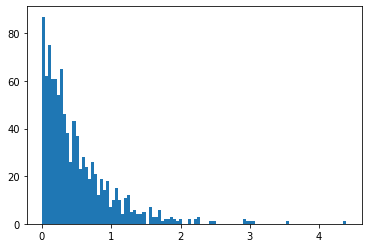

In [4]:
plt.hist(expo,bins=100);

2. For some particular $\mu$ of your choosing, make a histogram of the random deviates and plot the appropriate Exponential density curve on top of the histogram to confirm that the generator is working. Verify that the mean and standard deviation are what they should be.

In [5]:
user_expo=-beta*np.log(np.random.uniform(low=0.0, high=1.0,size=1000))

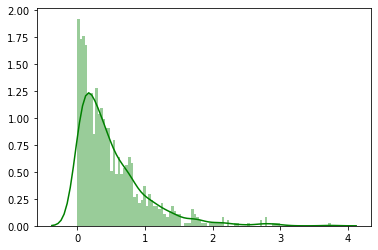

In [6]:
sns.distplot(user_expo,bins=100,color='green');

In [7]:
print(np.mean(expo))
print(np.std(expo))
print(np.mean(user_expo))
print(np.std(user_expo))

0.5045074565317819
0.5060124948666023
0.5030985166879586
0.5020034173524911


3. Compare the speed of your Exponential generator to the language generator (rexp in R, numpy.random.exponential in Python). Try to make your generator computationally competitive with the built in generator, by avoiding for loops and other slow code.

In [8]:
start = timer()
user_expo=-beta*np.log(np.random.uniform(low=0.0, high=1.0,size=1000))
end = timer()
print(end - start)

0.0014590000000005432


In [9]:
start = timer()
expo=np.random.exponential(scale=beta, size=1000)
end = timer()
print(end - start)

0.00025419999999876097


## Question 2: Simulation Study of the LLN and CLT

1. Create a $n \times m$ matrix $X$ with $n=100$ and $m=1000$ and each entry $1$ with probability $p=0.5$ and $0$ with probability $1-p=0.5$. For intuition, consider the following situation: suppose 1/2 of all voters support proposition A and that we conduct 100 surveys (number of rows of X) each with 1000 voters (number of columns = sample size of poll). A voter responds 1 if they support A, 0 if they do not support A. Note on confusing notation: the sample size of each poll is $m$. Usually $n$ is sample size, but here it is the number of surveys.

In [10]:
rand_bin=np.random.binomial(1, 0.5, 100000)#creates 0 & 1 with a probability of 0.5
X=rand_bin.reshape((100,1000))

2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $j$ entry of $Y$ is
$$Y_{ij} = \frac{1}{j} \sum_{k=1}^j X_{ik}$$
for $i=1,\dots,n$ and $j=1,\dots,m$. Try to avoid using nested for loops.

In [11]:
Y_cumsum=np.cumsum(X,axis=1)
Y=np.zeros((100,1000))
i=0
j=0
while i<100:
    Y[i,j]=Y_cumsum[i,j]/(j+1)# calculates the running mean
    j=j+1
    if (j==1000):
       j=0
       i=i+1

3. Plot each row of $Y$ (on the y-axis) against the column number (on the x-axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 10th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. (If you want to make the results clearer and prettier, draw all histograms or density estimators on top of each other with different colors, see lecture notes from the first class [here](https://nbviewer.jupyter.org/urls/david-jones-statistics.github.io/statcomp/lectures/topic1-intro/00intro.ipynb)  for how to do this with ggplot in R or [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) for code in Python from VanderPlas).

<img src="https://david-jones-statistics.github.io/statcomp/hw/lln_plot.png">

<img src="https://david-jones-statistics.github.io/statcomp/hw/clt_histograms.png">

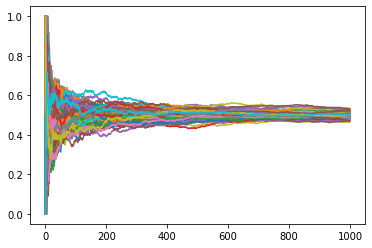

In [12]:
plt.plot(Y.T)# Transpose
plt.show()

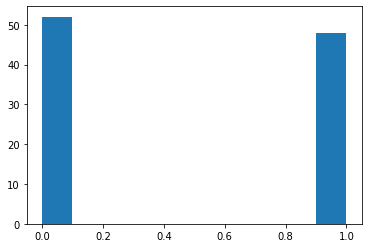

In [13]:
plt.hist(Y[0:,0]); # Takes the first column

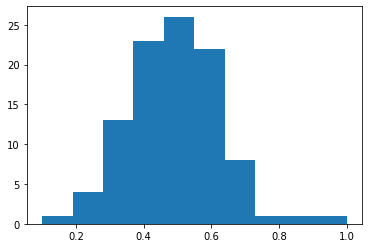

In [14]:
plt.hist(Y[0:,9]);# 10th Column

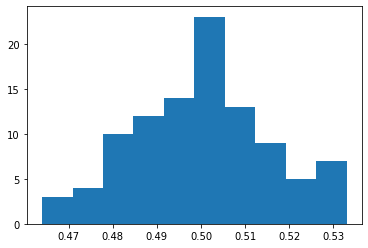

In [15]:
plt.hist(Y[0:,999]);# 1000th column

4. Take the variance of each column of $Y$ to produce a vector $\boldsymbol{u}$ of length $m$ giving the running variance of the means across the $n$ surveys. Plot $1/\boldsymbol{u}_j$ (on the y-axis) against $j$ (on the x-axis), and add a line showing $j/(p(1-p))$, for $j=1,\dots,m$. 

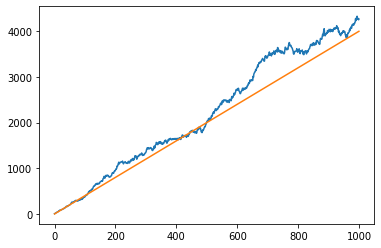

In [16]:
u=np.var(Y,axis=0)
rec=np.reciprocal(u) #Inverse of u
plt.plot(rec)
j=np.arange(1000)
cal=1/(0.5**2) 
k=j*cal #j/(p(1-p))
plt.plot(k)
plt.show()

5. Explain what the simulation results in parts 3 and 4 are showing.

    - $LLN$: states that when performing the same experiment for repeated number of times, the average of the results are close to the expected value and becomes more close to the expected value when trials increases.
    - $CLT$: As the sample size increases from 0 to inf, sample mean approximates normal distribution(bell shaped curve).
###### LLN
    - 0's and 1's are mapped into a 100x1000 matrix with a probability of 0.5 and running mean is taken against the rows.
    - Running mean is plotted against the column numbers which shows 100 lines in 1 plot
    - Since the probability we have given is 0.5, it converges to 0.5 as the number of trials increases.
###### CLT
    - Initially in the first column, most of the numbers are 0's and 1's as the column number increases random numbers are widely spread sample mean approximates normal distribution.
###### Variance plot
    - This plot shows the actual and theoretical running variances.
    - Actual variance closely resembles the theoretical line, as the number of observations increases, the actual variance closely follows the theoretical.